our problem can be seen as how to estimate the number of cell type

In [1]:
import pandas as pd

trajectory = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/trajectory-0719.csv', index_col=0)
trajectory.columns = [f"Celltype_{i}" for i in range(trajectory.shape[1])]
trajectory.head()

,Celltype_0,Celltype_1,Celltype_2,Celltype_3,Celltype_4,Celltype_5,Celltype_6,Celltype_7
lineage,,,,,,,,
MT_lineage,Malpighian tubule anlage,Malpighian tubule primordium,Malpighian tubule,NaN,NaN,NaN,NaN,NaN
HG_lineage,hindgut anlage,foregut/hindgut primordium,large intestine,hindgut,NaN,NaN,NaN,NaN
TS_lineage,tracheal anlage,tracheal primordium,dorsal trunk,tracheal system,NaN,NaN,NaN,NaN
FG_lineage,foregut primordium,developing foregut,pharynx primordium,esophagus primordium,pharynx,esophagus,adult foregut precursors,atrium
PV_lineage,proventriculus primordium,proventriculus,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cell_connection = []

for lineage in trajectory.iterrows():
    for i in range(len(lineage[1].dropna()) - 1):
        cell_connection.append([lineage[1][i], lineage[1][i+1]])
    
pd.DataFrame(cell_connection, columns=['Celltype_1', 'Celltype_2']).to_csv('/home/ouyangkang/data/trajectory_graph/celltype_connection.csv', index=None)

In [1]:
import scanpy as sc

sc_data = sc.read_h5ad('/mnt/c/Users/ouyangkang/Desktop/convert_sc_data.h5ad')
sc_data

AnnData object with n_obs × n_vars = 238242 × 16725
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'cell', 'pANN', 'library', 'RNA_snn_res.0.5', 'seurat_clusters', 'collected_time', 'infer_age', 'infer_age_int', 'tissue_old', 'sub_cluster_number', 'celltype', 'tissue_update', 'germ_layer', 'subtype'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_scvi', 'X_umap'

In [2]:
sc.tl.pca(sc_data, svd_solver='arpack')
sc.pp.neighbors(sc_data, n_neighbors=10, n_pcs=40)


/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
sc.tl.umap(sc_data)

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


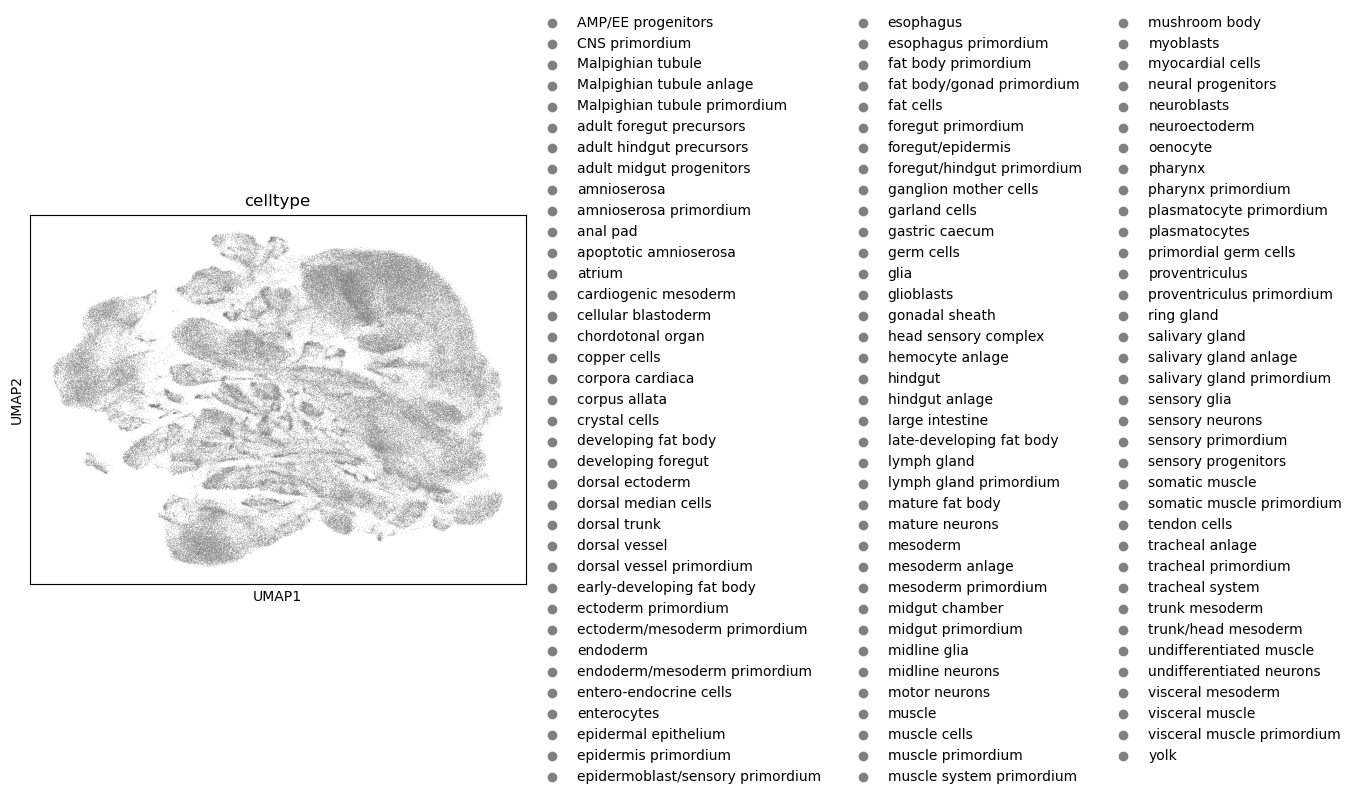

In [24]:
sc.pl.umap(sc_data, color=['celltype'])